In [9]:
from scipy.fft import fft,ifft,fftfreq
import numpy as np
import matplotlib.pyplot as plt

Fourier Transform enables us to break down a collection of signals, into their constituent components.

In mathematics, the discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The interval at which the DTFT is sampled is the reciprocal of the duration of the input sequence. An inverse DFT is a Fourier series, using the DTFT samples as coefficients of complex sinusoids at the corresponding DTFT frequencies. It has the same sample-values as the original input sequence. The DFT is therefore said to be a frequency domain representation of the original input sequence. If the original sequence spans all the non-zero values of a function, its DTFT is continuous (and periodic), and the DFT provides discrete samples of one cycle. If the original sequence is one cycle of a periodic function, the DFT provides all the non-zero values of one DTFT cycle.  
Since it deals with a finite amount of data, it can be implemented in computers by numerical algorithms or even dedicated hardware. These implementations usually employ efficient fast Fourier transform (FFT) algorithms;[3] so much so that the terms "FFT" and "DFT" are often used interchangeably. Prior to its current usage, the "FFT" initialism may have also been used for the ambiguous term "finite Fourier transform".

The discrete Fourier transform transforms a sequence of N complex numbers $${\displaystyle \left\{\mathbf {x} _{n}\right\}:=x_{0},x_{1},\ldots ,x_{N-1}}$$into another sequence of complex numbers,$${\displaystyle \left\{\mathbf {X} _{k}\right\}:=X_{0},X_{1},\ldots ,X_{N-1},}$$ which is defined by

$${\displaystyle {\begin{aligned}X_{k}&=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}\\&=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right],\end{aligned}}}$$


where the last expression follows from the first one by Euler's formula.

The transform is sometimes denoted by the symbol ${\displaystyle {\mathcal {F}}}$, as in ${\displaystyle \mathbf {X} ={\mathcal {F}}\left\{\mathbf {x} \right\}}$.

In [10]:
def DFT(x):
    # x: array
    N = len(x)
    X = []
    for k in range(N):
        val = 0
        for n in range(N):
            val += x[n]*np.exp(-((1j*2*np.pi)/N)*k*n)
        X.append(val)
    return X
        

In [11]:
x = np.array([1.0,2.0,1.0,-1.0,1.5])
z = DFT(x)
y = fft(x)

In [12]:
z,y

([(4.5+0j),
  (2.0815594803123156-1.6510987627325227j),
  (-1.8315594803123167+1.6082204064440697j),
  (-1.8315594803123147-1.6082204064440715j),
  (2.081559480312316+1.651098762732524j)],
 array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
        -1.83155948+1.60822041j, -1.83155948-1.60822041j,
         2.08155948+1.65109876j]))

It is the discrete analog of the formula for the coefficients of a Fourier series:
$${\displaystyle x_{n}={\frac {1}{N}}\sum _{k=0}^{N-1}X_{k}\cdot e^{i2\pi kn/N},\quad n\in \mathbb {Z} ,}$$
which is also $N-periodic$. In the domain $n \in \left[0, N − 1\right]$, this is the inverse transform of Eq.1. In this interpretation, each $X_{k}$ is a complex number that encodes both amplitude and phase of a complex sinusoidal component $\left(e^{i2\pi kn/N}\right)$ of function $x_{n}$.

In [13]:
def inv_DFT(X):
    # X: array
    N = len(X)
    x = []
    for n in range(N):
        val = 0
        for k in range(N):
            val += (X[k]*np.exp(((1j*2*np.pi*k*n)/N)))
        x.append((1/N)*val)
    return x

z = inv_DFT(y)
yinv = ifft(y)
z,yinv

([(1+0j),
  (2-8.881784197001253e-17j),
  (0.9999999999999999+0j),
  (-1+7.993605777301127e-16j),
  (1.5000000000000007-2.664535259100376e-16j)],
 array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j]))

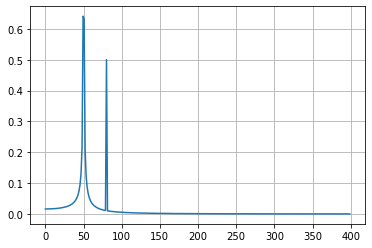

In [14]:
N = 600 #Number of sample points
T = 1.0/800.0 #Sample Spacing
x = np.linspace(0.0,N*T,N,endpoint=False)
y = np.sin(50.0*2.0*np.pi*x) + 0.5*np.sin(80.0*2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N,T)[:N//2]
plt.plot(xf,2.0/N*np.abs(yf[0:N//2]))
plt.grid()
plt.show()

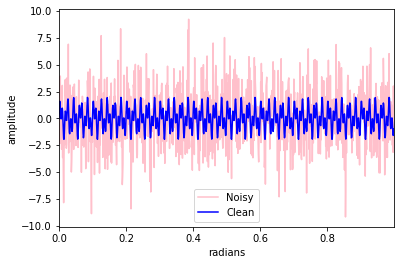

In [33]:
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)  #sum of 2 frequencies
f_clean = f
f=f+2.5*np.random.randn(len(t))               #Add some noise
plt.plot(t,f,color='pink',label='Noisy')
plt.plot(t,f_clean,color='blue', label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('radians')
plt.ylabel('amplitude')
plt.legend()

To put it simply, the FFT uses an iterative approach to break down the wave into constituent components, in order for us to visualize which ones are significant.

/Users/shawnshobeiri/Anaconda/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


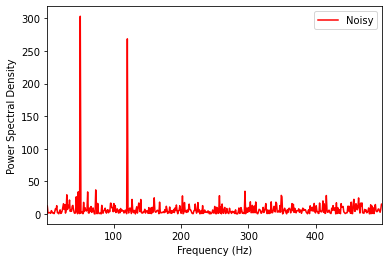

In [34]:
n = len(t)
fhat = np.fft.fft(f,n)                     #compute the FFT
PSD = fhat * np.conj(fhat)/n               #power spectrum 
freq = (1/(dt*n)) * np.arange(n)           #x-axis of frequencies 
L = np.arange(1,np.floor(n/2),dtype='int') #only plot 1st half
plt.plot(freq[L], PSD[L],color='red', label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.show()


The visualization here shows it very clearly, that there are two waves of an approximate amplitude of 225 and 275 units respectively. They have frequencies of about 50 Hz and 120 Hz.

These two constituent waves are the components of the underlying wave.

/Users/shawnshobeiri/Anaconda/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


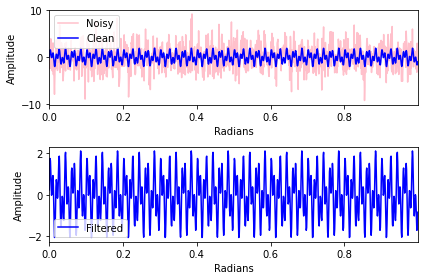

In [35]:
#Use PSD to filter out noise
indices = PSD > 100        # Find all freqs with large power
PSDclean = PSD * indices   # zero out all others via kronecker delta
fhat = indices*fhat        # zero out small fourier coffef. in Y
ffilt = np.fft.ifft(fhat)  # inverse fFFT for filtered time signal
#plot
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='pink', label='Noisy')
plt.plot(t,f_clean,color='blue', label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.legend()
plt.sca(axs[1])
plt.plot(t, ffilt,color='blue', label='Filtered')
plt.xlim(t[0],t[-1])
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

Via a mathematical trick, the waves with an amplitude below 100, are simply computed as zero.

Via the Inverse Fast Fourier Transform, We can then recover the underlying wave that is formed by the 2 component waves via doing the reverse.

<AxesSubplot:title={'center':'TSLA stock price ($)'}, xlabel='Date'>

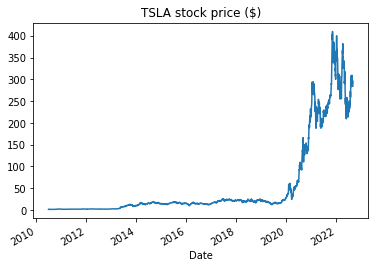

In [38]:
import yfinance as yf
import pandas as pd
ticker= yf.Ticker('TSLA')
tsla_df = ticker.history(period='max')
tsla_df['Close'].plot(title='TSLA stock price ($)')

As the graph shows, 2020 was supposed to be Tesla’s coming out year, with eye-watering gains of 300%!! A blitz from $200 to above $800.

However, due to the unprecedented volatility from the global spread of the Coronavirus, it took a massive dive down to around $300, before rallying up again (Stock data retrieved as of 29/05/2020)

Such events are called Black Swans, eponymously named after the presence of black feathered swans, among the usually white feathered ones.

Text(0.5, 1.0, 'Tesla Price')

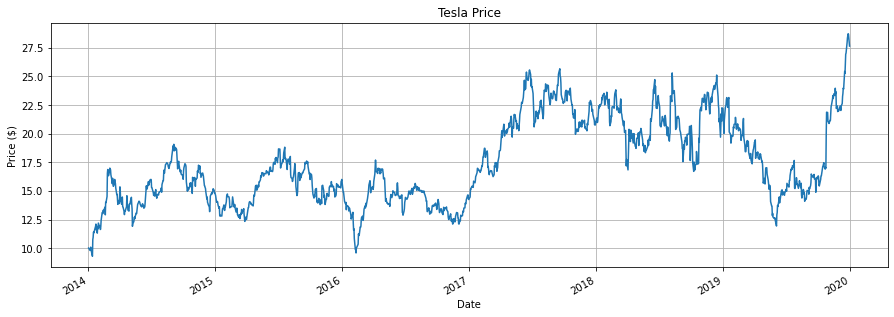

In [40]:
tsla_df = yf.download('TSLA',
                      start='2014-01-01',
                      end='2019-12-31',
                      progress=False)
plt.figure(figsize=(15,5))
tsla_df['Adj Close'].plot(grid=True)
plt.ylabel('Price ($)')
plt.title('Tesla Price')


In [66]:
tsla_df['delta'] = tsla_df['Adj Close'].diff().shift(-1)

In [67]:
tsla_df = tsla_df[:-1]

/var/folders/h2/fvkvsp9j4fjbqfq72gzdqh1r0000gn/T/ipykernel_5023/1869362052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['theta']=np.arctan(sp.imag/sp.real)
/var/folders/h2/fvkvsp9j4fjbqfq72gzdqh1r0000gn/T/ipykernel_5023/1869362052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['amplitude']=np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
/var/folders/h2/fvkvsp9j4fjbqfq72gzdqh1r0000gn/T/ipykernel_5023/1869362052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

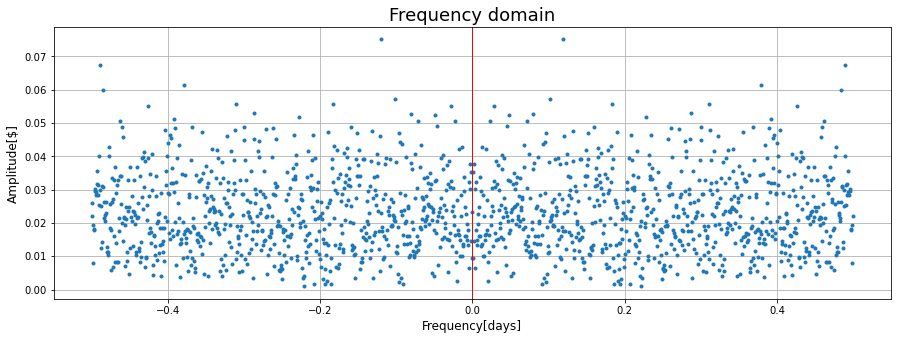

In [69]:
sp=np.fft.fft(tsla_df['delta'].values)
tsla_df['theta']=np.arctan(sp.imag/sp.real)
numValues = len(tsla_df)
numValuesHalf = numValues/2
tsla_df['amplitude']=np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
tsla_df['freq'] = np.fft.fftfreq(sp.size, d=1)
tsla_df.head()
plt.figure(figsize=(15,5))
plt.plot(tsla_df['freq'],tsla_df['amplitude'].values,'.')
plt.axvline(x=0,ymin=0,ymax=1,linewidth=1,color='r')
plt.ylabel('Amplitude[$]', fontsize=12)
plt.xlabel('Frequency[days]', fontsize=12)
plt.title('Frequency domain', fontsize=18)
plt.grid()

The frequencies are symmetrical around and the origin, as is the case when doing Fourier transforms. We hence need only confine our analysis to the positive frequencies.

This is so, as an occurrence in the ‘real’ world can only have a positive and real frequency. (Unless you wish to venture down the rabbit hole, into the bizarre world of Quantum Mechanics.)

As we can see, unlike the artificially created signal, real-world data is significantly more complex and it is much harder to differentiate meaningful data from the noise.

We chose to designate a meaningful signal as one that is more than 3 standard deviations from the mean, and has designated the other signals as noise.

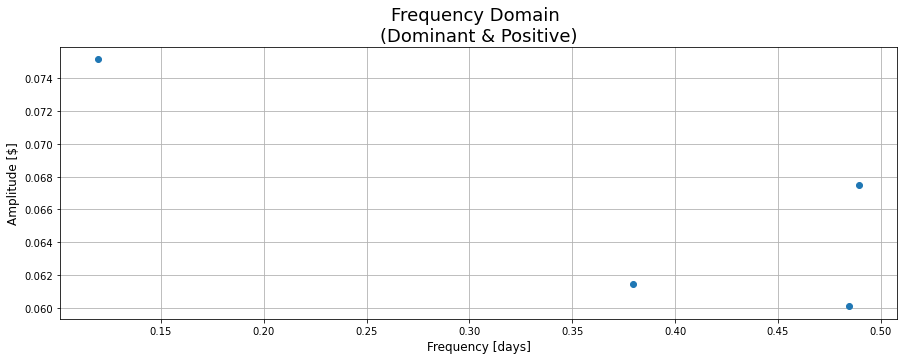

In [70]:
df = tsla_df
meanAmp = df['amplitude'].mean()
stdAmp = df['amplitude'].std()
dominantAmpCheck = df['amplitude'] > (3*stdAmp + meanAmp) 
positiveFreqCheck = df['freq'] > 0
dominantAmp = df[dominantAmpCheck & positiveFreqCheck]['amplitude']
dominantFreq = df[dominantAmpCheck & positiveFreqCheck]['freq']
dominantTheta = df[dominantAmpCheck & positiveFreqCheck]['theta']
plt.figure(figsize=(15,5))
plt.plot(dominantFreq, dominantAmp, 'o')
plt.ylabel('Amplitude [$]', fontsize=12)
plt.xlabel('Frequency [days]', fontsize=12)
plt.title('Frequency Domain \n(Dominant & Positive)', fontsize=18)
plt.grid()

Through filtering the noise, we see that there are 3 significant signals.

The interpretation here is that, there are potentially three separate events that exert an influence on the stock price, occurring at frequencies of approximately 0.03, 0.17, and 0.36 days.

In the quantamental approach, this could provide some form of assistance to the portfolio analysts, and assist them in narrowing down their search to events that occur in the neighborhood of said frequencies.